In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
from scipy import optimize
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
def loss_lasso(w,lam,X,y):
    loss = np.sum((np.dot(X,w) - y)**2)/len(y) + lam*np.sum(np.abs(w));
    return loss;

(array([  0.,   0.,   0., 100.,   0.,   0.,   0.]),
 array([-0.5       , -0.35714286, -0.21428571, -0.07142857,  0.07142857,
         0.21428571,  0.35714286,  0.5       ]),
 <BarContainer object of 7 artists>)

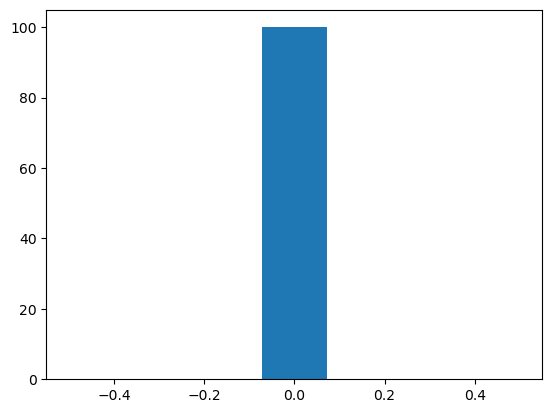

In [5]:
lasso_variables = [];
penalty = 1.0;
nobs = 100;

for i in range(100):
    X0  = np.random.random((nobs, 20));
    X   = np.c_[np.ones((nobs, 1)), X0];
    beta = np.zeros(21);
    e = np.random.random(nobs);
    y = np.dot(X,beta)+e;
    results = optimize.minimize(
        lambda w: loss_lasso(w,penalty,X,y),
        x0 = np.zeros(X.shape[1])
        );
    lasso_variables.append(np.sum(np.abs(results.x)));

plt.hist(lasso_variables, bins=7)

(array([  0.,   0.,   0., 100.,   0.,   0.,   0.]),
 array([-0.5       , -0.35714286, -0.21428571, -0.07142857,  0.07142857,
         0.21428571,  0.35714286,  0.5       ]),
 <BarContainer object of 7 artists>)

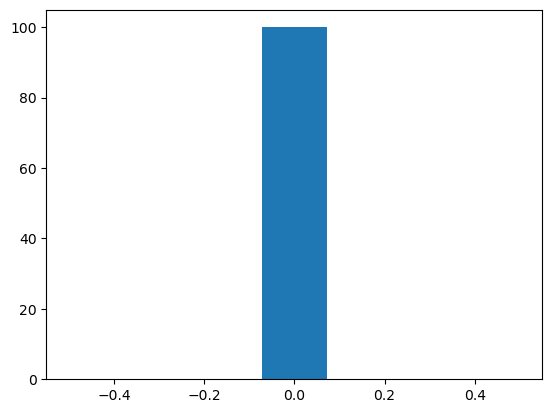

In [6]:
lasso_variables = [];
penalty = 20.0;
nobs = 100;

for i in range(100):
    X0  = np.random.random((nobs, 20));
    X   = np.c_[np.ones((nobs, 1)), X0];
    beta = np.zeros(21);
    beta[1] = 1.0
    e = np.random.random(nobs);
    y = np.dot(X,beta)+e;
    results = optimize.minimize(
        lambda w: loss_lasso(w,penalty,X,y),
        x0 = np.zeros(X.shape[1])
        );
    lasso_variables.append(np.sum(np.abs(results.x)));

plt.hist(lasso_variables, bins=7)

In [7]:
x = np.arange(6).reshape(2,3);
x

array([[0, 1, 2],
       [3, 4, 5]])

In [10]:
np.c_[np.ones(2), x]

array([[1., 0., 1., 2.],
       [1., 3., 4., 5.]])

In [11]:
def loss_ridge(w,lam,X,y):
    loss = np.sum((np.dot(X,w) - y)**2)/len(y) + lam*np.sum(w**2);
    return loss;

(array([ 2.,  9., 19., 33., 20., 14.,  3.]),
 array([0.17628006, 0.18641212, 0.19654418, 0.20667624, 0.2168083 ,
        0.22694037, 0.23707243, 0.24720449]),
 <BarContainer object of 7 artists>)

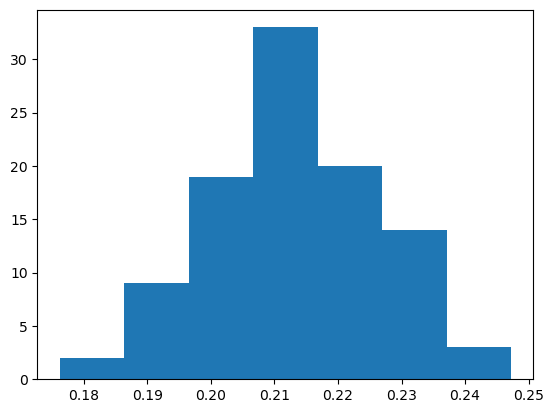

In [13]:
ridge_variables = [];
penalty = 20.0;
nobs = 100;

for i in range(100):
    X0  = np.random.random((nobs, 20));
    X   = np.c_[np.ones((nobs, 1)), X0];
    beta = np.zeros(21);
    #beta[1] = 1.0
    e = np.random.random(nobs);
    y = np.dot(X,beta)+e;
    results = optimize.minimize(
        lambda w: loss_ridge(w,penalty,X,y),
        x0 = np.zeros(X.shape[1])
        );
    ridge_variables.append(np.sum(np.abs(results.x)));

plt.hist(ridge_variables, bins=7)

# FORK

In [14]:
n   =   100;
z   =   np.random.normal(0,1,size=n);
x   =   2*z + np.random.normal(0,1,size=n);
y   =   -1*z + np.random.normal(0,1,size=n);

data = pd.DataFrame(
    {
        'x' : x,
        'y' : y,
        'z': z
    }
)
data.head()

,x,y,z
0,0.448552,-1.110004,-0.808289
1,0.478755,-1.095507,1.270986
2,-0.878715,2.472587,-0.668940
3,1.559590,0.011913,0.460994
4,1.833911,-1.811005,1.354976


In [15]:
import statsmodels.formula.api as smf

In [17]:
smf.ols(
    formula = "y~x",
    data = data
) \
    .fit() \
    .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     107.2
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           2.08e-17
Time:                        12:16:22   Log-Likelihood:                -148.09
No. Observations:                 100   AIC:                             300.2
Df Residuals:                      98   BIC:                             305.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0522      0.108     -0.485      0.629      -0.266       0.161
x             -0.4776      0.046    -10.353      0.000      -0.569      -0.386
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                0.969
Skew:                          -0.099   Prob(JB):                        0.616
Kurtosis:                       2.560   Cond. No.                         2.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
smf.ols(
    formula = "y~x+z",
    data = data
) \
    .fit() \
    .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     67.33
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           4.61e-19
Time:                        12:17:31   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             289.0
Df Residuals:                      97   BIC:                             296.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0469      0.101     -0.463      0.644      -0.248       0.154
x             -0.1316      0.103     -1.274      0.206      -0.337       0.073
z             -0.8077      0.219     -3.693      0.000      -1.242      -0.374
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                1.840
Skew:                          -0.028   Prob(JB):                        0.399
Kurtosis:                       2.338   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# PIPE

In [19]:
n   =   100;

x   =   np.random.normal(0,1,size=n);
z   =   2*x + np.random.normal(0,1,size=n);
y   =   -1*z + np.random.normal(0,1,size=n);

data = pd.DataFrame(
    {
        'x' : x,
        'y' : y,
        'z': z
    }
)
data.head()

,x,y,z
0,0.877637,-0.040284,0.833775
1,-0.769931,3.214568,-2.107161
2,1.103938,-1.248797,0.782368
3,-3.114869,5.632025,-5.953996
4,2.383355,-6.635769,4.539493


In [20]:
smf.ols(
    formula = "y~x+z",
    data = data
) \
    .fit() \
    .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     261.7
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           8.25e-40
Time:                        12:21:40   Log-Likelihood:                -138.35
No. Observations:                 100   AIC:                             282.7
Df Residuals:                      97   BIC:                             290.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1285      0.100     -1.289      0.201      -0.326       0.069
x              0.1125      0.232      0.484      0.629      -0.349       0.574
z             -1.0509      0.112     -9.370      0.000      -1.274      -0.828
==============================================================================
Omnibus:                        0.649   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.759
Skew:                          -0.083   Prob(JB):                        0.684
Kurtosis:                       2.606   Cond. No.                         6.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
smf.ols(
    formula = "y~x",
    data = data
) \
    .fit() \
    .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     231.0
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           1.62e-27
Time:                        12:22:36   Log-Likelihood:                -170.58
No. Observations:                 100   AIC:                             345.2
Df Residuals:                      98   BIC:                             350.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0420      0.135      0.312      0.755      -0.225       0.309
x             -1.8923      0.125    -15.197      0.000      -2.139      -1.645
==============================================================================
Omnibus:                        0.846   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.412
Skew:                           0.097   Prob(JB):                        0.814
Kurtosis:                       3.248   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""